In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [1]:
## read data from excel
def read(file):
    wb = xlrd.open_workbook(filename=file) #open the file
    sheet = wb.sheet_by_index(0) # read the tabulation with index
    rows = sheet.nrows ## ge the number of rows
    all_content = []
    for j in range(0,2): # get 1-2 columns of the data
        temp = []
        for i in range(1,rows):
            cell = sheet.cell_value(i,j) ## get the elements without label(x,y)
            temp.append(cell)
        all_content.append(temp)
        temp =[]
    return np.array(all_content)

In [3]:
#获得拟合函数并绘制图象
def temp1(datas):
    x = datas[0]        #获取自变量x
    y = datas[1]        #获取因变量y
    n = np.size(answer1, axis = 1)  #获取有多少个自变量，axis=1代表获取矩阵的列数
    #根据公式计算k
    k = (n*np.sum(x*y) - np.sum(x)*np.sum(y)) / (n*np.sum(np.power(x,2)) - np.sum(x) * np.sum(x))   
    #根据公式计算b
    b = (np.sum(np.power(x,2)) * np.sum(y) -np.sum(x) * np.sum(x*y)) / (n*np.sum(np.power(x,2)) - np.sum(x) * np.sum(x))
    las = k*x + b       #根据公式得到拟合函数
    fig = plt.figure()  #获得figure对象
    ax1 = fig.add_subplot(1,1,1)    #添加一个图纸
    ax1.set_xlim([min(x)-0.5, max(x)+0.5])      #设置x轴刻度
    ax1.set_ylim([min(y) -0.5, max(y) +0.5])    #设置y轴刻度
    plt.plot(x,las,'k',label='拟合函数')    #画出拟合函数
    plt.plot(x,y,'o',label = '样本数据')    #画出样本数据
    plt.grid()  #添加网格线
    ax1.legend(loc = 'best')    #设置图例的位置为最佳best
    return [k,b]    #返回k和b


In [4]:
#通过计算拟合优度评价拟合函数
def judge(datas,k,b):
    x = datas[0]    #获取自变量x
    y = datas[1]    #获取自变量y
    z = k * x + b   #得到拟合函数
    SST = np.sum(np.power(y - np.average(y),2))     #根据公式计算SST
    SSE = np.sum(np.power(y - z, 2))                #根据公式计算SSE
    SSR = np.sum(np.power(z - np.average(y),2))     #根据公式计算SSR
    R_2 = SSR / SST             #得到R_2
    print('k = ',k)
    print('b = ',b)
    print('SST = ',SST)
    print('SSE = ',SSE)
    print('SSR = ',SSR)
    print('R_2 = ',R_2)


k =  2.09484154875776
b =  -1.0547840968126607
SST =  156.88631578947368
SSE =  5.728062372031907
SSR =  151.15825341744255
R_2 =  0.9634890886231426


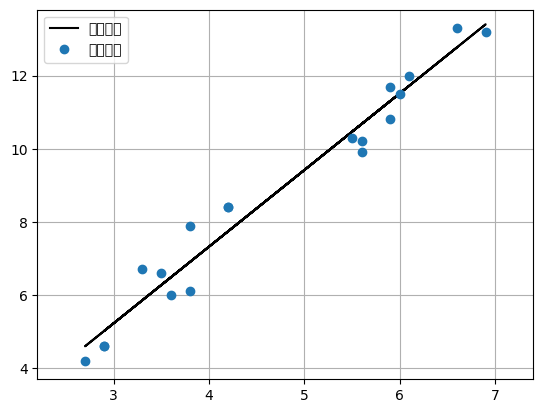

In [16]:
answer1 = read("linear_fit.xls")
answer2 = temp1(answer1)
judge(answer1,answer2[0],answer2[1])

In [14]:
wb = xlrd.open_workbook("linear_fit.xls")
wb